#                              近期工作、学习总结

# 主要内容：



1、广西项目中的一些实用方法和工具；

2、scikit-learn的基础学习。

In [7]:
%pylab inline
import shapely, geopandas, fiona, pyproj
import seaborn as sns
from fiona.crs import from_epsg,from_string
from pyproj import Proj,transform
import matplotlib.pylab as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [8]:
shp = 'CHN_adm2.shp'
c = fiona.open(shp)
c.crs

{'init': u'epsg:4326'}

In [61]:
shp_df = geopandas.GeoDataFrame.from_file(shp)
shp_df


,ENGTYPE_2,ID_0,ID_1,ID_2,ISO,NAME_0,NAME_1,NAME_2,NL_NAME_2,TYPE_2,VARNAME_2,geometry
0,Prefecture City,48,20,221,CHN,China,Ningxia Hui,Guyuan,???,Dìjíshì,Gùyuán,"POLYGON ((106.4447174072266 36.59582138061535,..."
1,Prefecture City,48,20,222,CHN,China,Ningxia Hui,Shizuishan,????,Dìjíshì,Shízuishan,"POLYGON ((106.7540130615236 39.37600708007818,..."
2,Prefecture City,48,20,223,CHN,China,Ningxia Hui,Wuzhong,???,Dìjíshì,Wúzhong,"POLYGON ((106.0342407226563 38.1763648986817, ..."
3,Prefecture City,48,20,224,CHN,China,Ningxia Hui,Yinchuan,???,Dìjíshì,Yínchuan,"POLYGON ((106.0500793457032 38.871826171875, 1..."
4,Prefecture City,48,20,225,CHN,China,Ningxia Hui,Zhongwei,???,Dìjíshì,Zhongwèi,"POLYGON ((105.9505920410156 37.7910270690918, ..."
5,Island,48,21,226,CHN,China,Paracel Islands,Paracel Islands,???????ÿo???,Qúndao,Xisha Qúndao,(POLYGON ((111.2083358764651 15.79055690765392...
6,Autonomous Prefecture,48,22,227,CHN,China,Qinghai,Golog Tibetan,???????,Zìzhìzhou,Guoluò Zàngzú,"POLYGON ((99.25931549072271 35.61923980712891,..."
7,Autonomous Prefecture,48,22,228,CHN,China,Qinghai,Gyêgu Tibetan,???????,Zìzhìzhou,Yùshù Zàngzú,"POLYGON ((90.03012084960966 36.27914428710932,..."
8,Autonomous Prefecture,48,22,229,CHN,China,Qinghai,Haibei Tibetan,???????,Zìzhìzhou,Haibei Zàngzú,"POLYGON ((98.99740600585955 38.95868682861351,..."
9,Prefecture,48,22,230,CHN,China,Qinghai,Haidong,????,Dìqu,Haidong,"POLYGON ((101.9966583251953 37.10119247436529,..."


In [13]:
shp_df = geopandas.GeoDataFrame.from_file(shp)
shp_df
x = shp_df[shp_df['NAME_1']=='Guangxi']
x

,ENGTYPE_2,ID_0,ID_1,ID_2,ISO,NAME_0,NAME_1,NAME_2,NL_NAME_2,TYPE_2,VARNAME_2,geometry
83,Prefecture City,48,7,64,CHN,China,Guangxi,Baise,???,Dìjíshì,Baisè,"POLYGON ((106.7500228881836 25.05607223510742,..."
84,Prefecture City,48,7,65,CHN,China,Guangxi,Beihai,???,Dìjíshì,Beihai,"(POLYGON ((109.2056961059572 20.9184703826906,..."
85,Prefecture City,48,7,66,CHN,China,Guangxi,Chongzuo,???,Dìjíshì,Chóngzuo,"POLYGON ((107.3465881347656 23.32303619384771,..."
86,Prefecture City,48,7,67,CHN,China,Guangxi,Fangchenggang,????,Dìjíshì,Fángchénggang,(POLYGON ((108.2326431274415 21.54125022888184...
87,Prefecture City,48,7,68,CHN,China,Guangxi,Guigang,???,Dìjíshì,Guìgang,"POLYGON ((110.390838623047 24.03856277465826, ..."
88,Prefecture City,48,7,69,CHN,China,Guangxi,Guilin,???,Dìjíshì,Guìlín,"POLYGON ((110.9896850585938 26.32592582702648,..."
89,Prefecture City,48,7,70,CHN,China,Guangxi,Hechi,???,Dìjíshì,Héchí,"POLYGON ((107.2260818481447 25.56772804260254,..."
90,Prefecture City,48,7,71,CHN,China,Guangxi,Hezhou,???,Dìjíshì,Hèzhou,"POLYGON ((111.3319091796876 25.09905815124517,..."
91,Prefecture City,48,7,72,CHN,China,Guangxi,Laibin,???,Dìjíshì,Láibin,"POLYGON ((110.2264785766601 24.36404991149914,..."
92,Prefecture City,48,7,73,CHN,China,Guangxi,Liuzhou,???,Dìjíshì,Liuzhou,"POLYGON ((109.6437835693359 26.02332687377935,..."


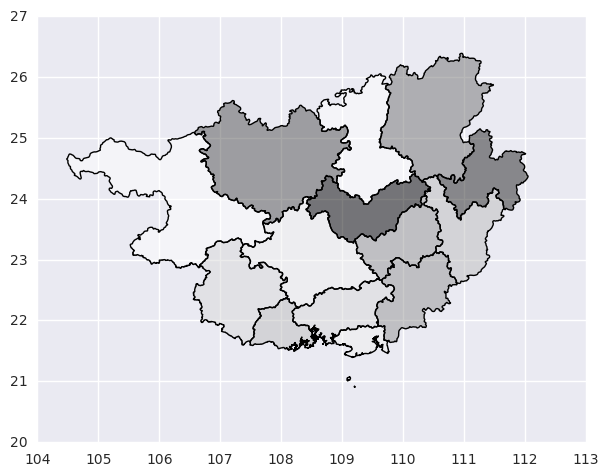

In [14]:
x.plot()

In [2]:
%matplotlib  inline
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame, read_file
from geopandas.tools import sjoin
from shapely.geometry import Point, mapping,shape
import time
import inner_boundary
import outer_boundary

In [3]:
from geopandas.geoseries import Polygon
from geopandas import GeoSeries

y = [Polygon(outer_boundary.outer_boundary)]
for i in range(len(inner_boundary.inner_boundary)):            
    p = Polygon(inner_boundary.inner_boundary[i])
    y.append(p)
p1 = outer_boundary.outer_boundary
g=GeoSeries(y)
g


0     POLYGON ((111.040409 26.322632, 111.04088 26.3...
1     POLYGON ((105.095897 24.928642, 105.100305 24....
2     POLYGON ((109.766219 21.666886, 109.76621 21.6...
3     POLYGON ((107.371019 23.083732, 107.37055 23.0...
4     POLYGON ((108.279821 22.206973, 108.276615 22....
5     POLYGON ((110.391919 24.042181, 110.392071 24....
6     POLYGON ((111.008574 26.35887, 111.002854 26.3...
7     POLYGON ((106.571122 25.083499, 106.571663 25....
8     POLYGON ((111.654855 23.833296, 111.654846 23....
9     POLYGON ((110.316906 24.296399, 110.318193 24....
10    POLYGON ((109.764755 25.876187, 109.761101 25....
11    POLYGON ((108.47658 23.977901, 108.47375 23.97...
12    POLYGON ((109.82035 22.578206, 109.821112 22.5...
13    POLYGON ((110.567472 24.362651, 110.569657 24....
14    POLYGON ((109.840071 22.571999, 109.838289 22....
dtype: object

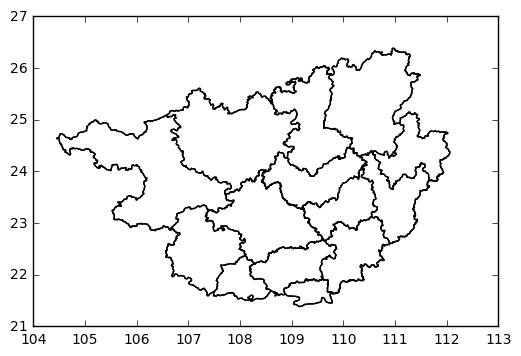

In [4]:
g.plot(color='white')

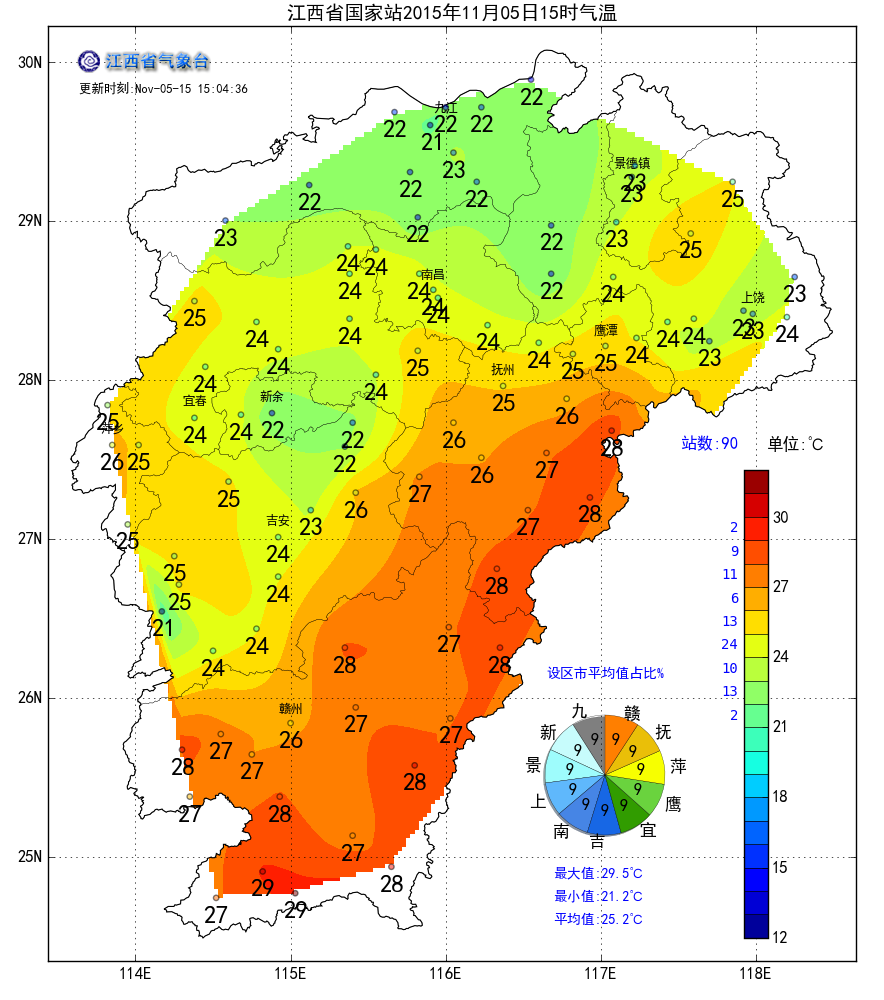

In [53]:
from IPython.display import Image
Image(filename='..\\images\\mark1.png', width=400, height=400)

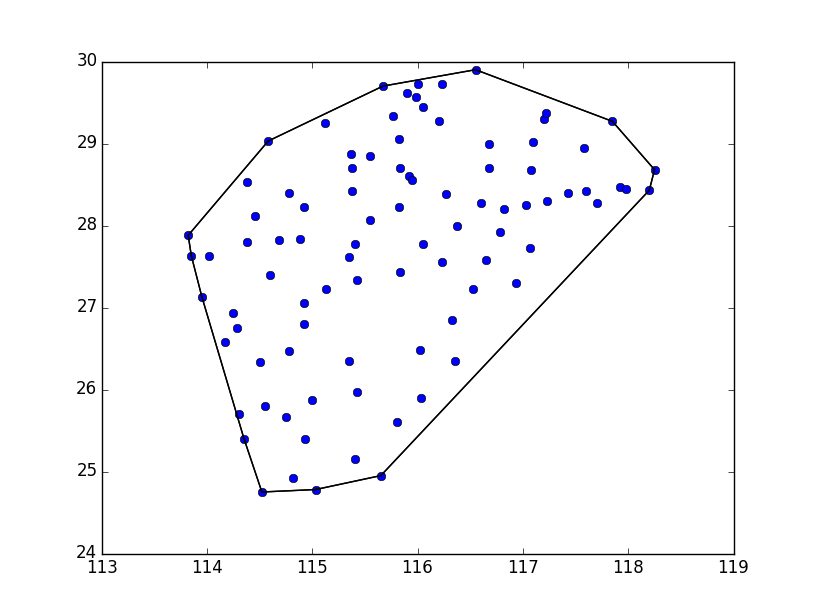

In [57]:
Image(filename='..\\images\\figure_1.png', width=400, height=400)

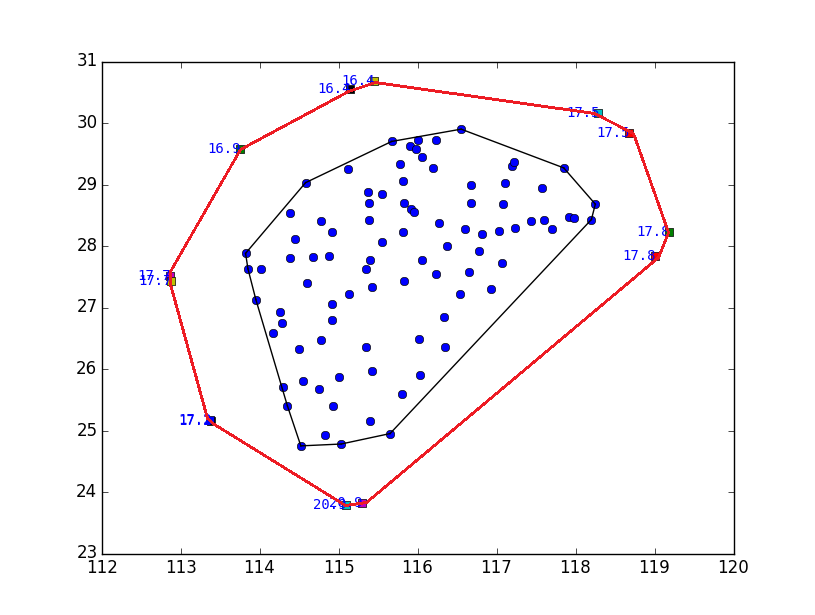

In [58]:
Image(filename='..\\images\\a.png', width=400, height=400)

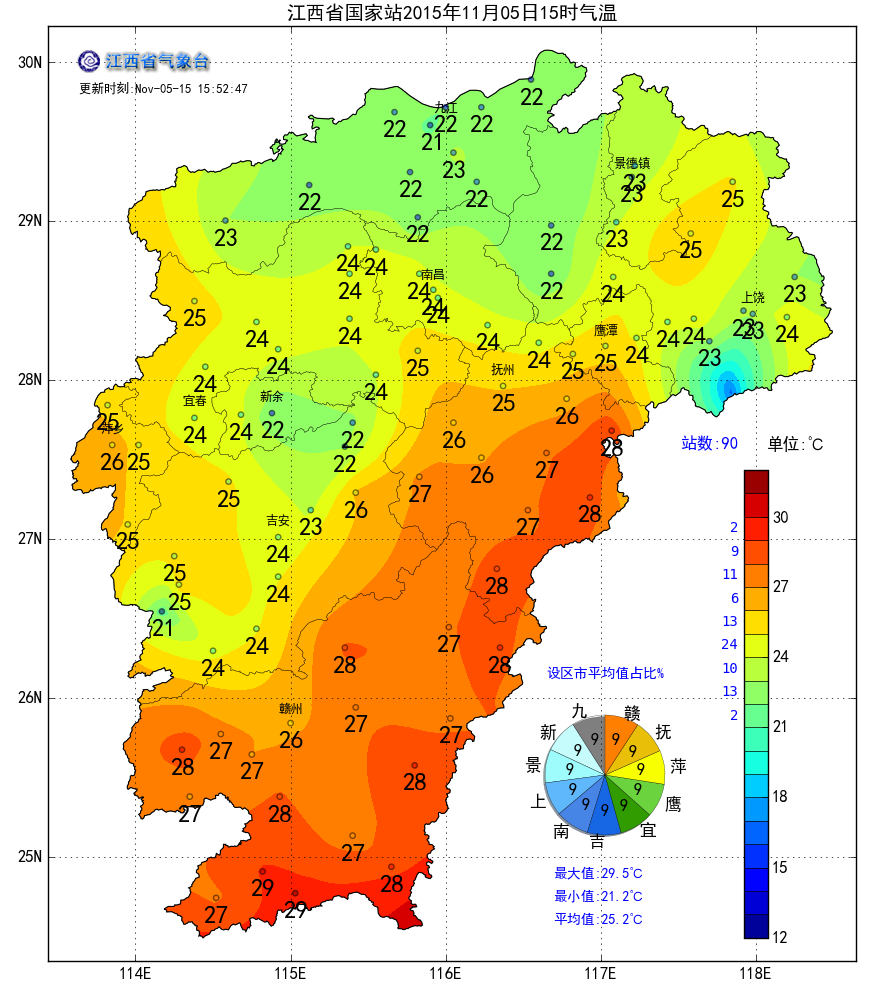

In [59]:
Image(filename='..\\images\\01.png', width=400, height=400)

In [60]:
import scipy.spatial
from sympy import *
from pylab import *
import sys

In [ ]:
class PolygonEx:
    def __init__(self, lons, lats, zvalues, d, path):
        """
        :param lons: x方向坐标数组
        :param lats: y方向坐标数组
        :param zvalues: 坐标数组对应的点值
        :param d: 扩大选取的距离
        :param path: 切图所用的path
        :type self: object
        """
        self.lons = lons
        self.lats = lats
        self.zvalues = zvalues
        self.d = d
        self.path = path

    def point_in_path(self, point):
        return self.path.contains_point((point[0], point[1]))

    def get_extend_hull(self):
        # 点集转换为numpy数组
        points = np.array([self.lons, self.lats]).T
        # 获取点集的凸多边形轮廓
        hull = scipy.spatial.ConvexHull(points)
        ext_points = []
        for simplex in hull.simplices:
            # 设置初值 以获得两个解
            pairs = [True, False]
            for pair in pairs:
                extend_point = self.equations(points[simplex], pair)
                # 在边界内的点排除
                if not self.point_in_path(extend_point):
                    ext_points.append([extend_point[0], extend_point[1], self.zvalues[simplex[0]]])
        return ext_points

    def equations(self, point_pairs, is_less):
        """
        以一条线段作为直角三角形的一条边，从这条线段的起点向该线段引一条距离为d的垂线，
        用垂线的另一点和该线段组成一个直角三角形，这个垂线上的另一点即为要扩展的轮廓的一点
        用以下两个方程组成二元二次方程组，求解可获得这点坐标
        ① 直角,向量法.（x-x1)(x2-x1)+(y-y1)(y2-y1)=0
        ② L,两点距离公式.（x-x1)²+(y-y1)²=l²
        解二元二次方程
        :param point_pairs:直角三角形的一条直角边
        :param is_less:初值的x坐标值是否大于直角边起点的x坐标值
        :return:返回一个解（x,y)
        :rtype: object
        """
        x1 = point_pairs[0][0]
        y1 = point_pairs[0][1]
        x2 = point_pairs[1][0]
        y2 = point_pairs[1][1]
        deta = 0.05
        if is_less:
            init_pairs = [x1 - deta, y1]
        else:
            init_pairs = [x1 + deta, y1]

        x = Symbol('x')
        y = Symbol('y')
        func = [(x2 - x1) * (x - x1) + (y2 - y1) * (y - y1), (x - x1) ** 2 + (y - y1) ** 2 - self.d ** 2]
        return nsolve(func, [x, y], init_pairs)

In [18]:
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=300, height=200)

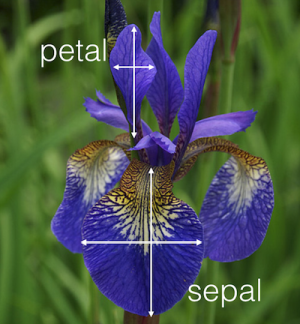

In [19]:
from IPython.display import Image
Image(filename='..\\images\\03_iris.png')

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()
type(iris)

sklearn.datasets.base.Bunch

In [21]:
print(iris.data)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [22]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [23]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [24]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [25]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [26]:
X = iris.data
y = iris.target

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


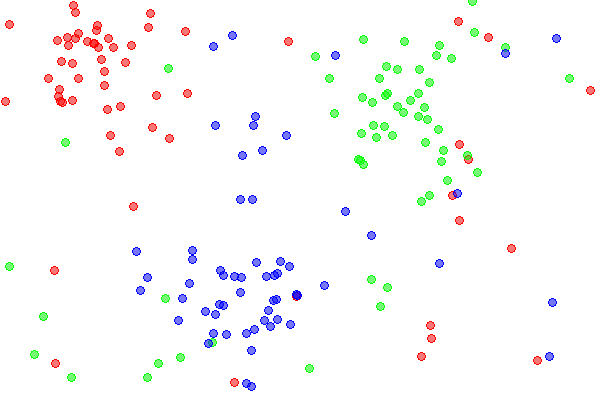

In [28]:
from IPython.display import Image
Image(filename='..\\images\\04_knn_dataset.png', width=400, height=400)

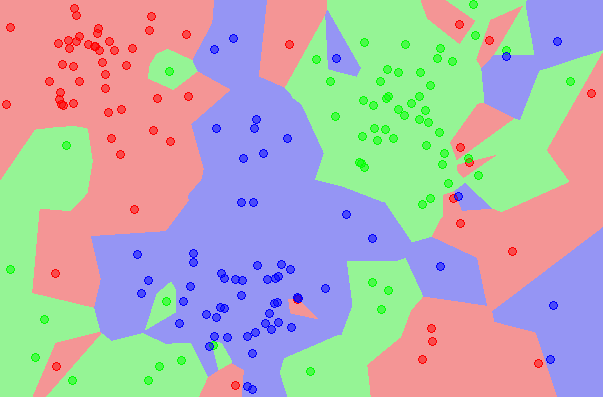

In [29]:
from IPython.display import Image
Image(filename='..\\images\\04_1nn_map.png',width=400, height=400)

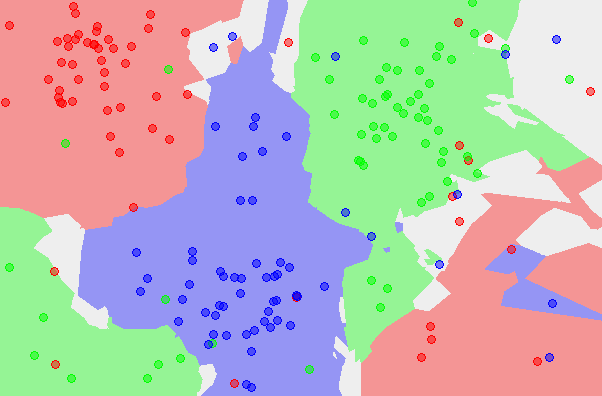

In [30]:
from IPython.display import Image
Image(filename='..\\images\\04_5nn_map.png',width=400, height=400)

In [31]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [32]:
knn.predict([[3, 5, 4, 2]])

array([2])

In [33]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([2, 1])

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
knn.predict(X_new)

array([1, 1])

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
logreg.predict(X_new)

array([2, 0])

In [36]:
from sklearn import metrics
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

c:\python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [38]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.966666666667


In [40]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.95


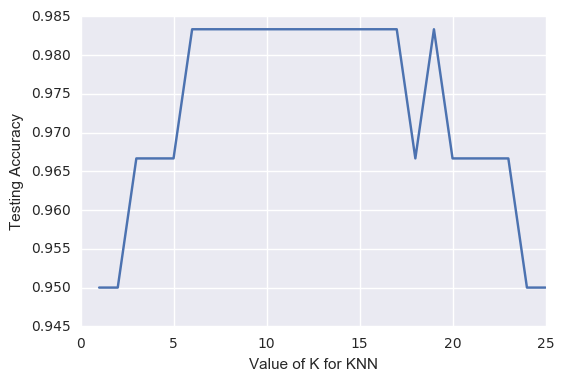

In [41]:
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [42]:
import pandas as pd
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [43]:
data.shape

(200, 4)

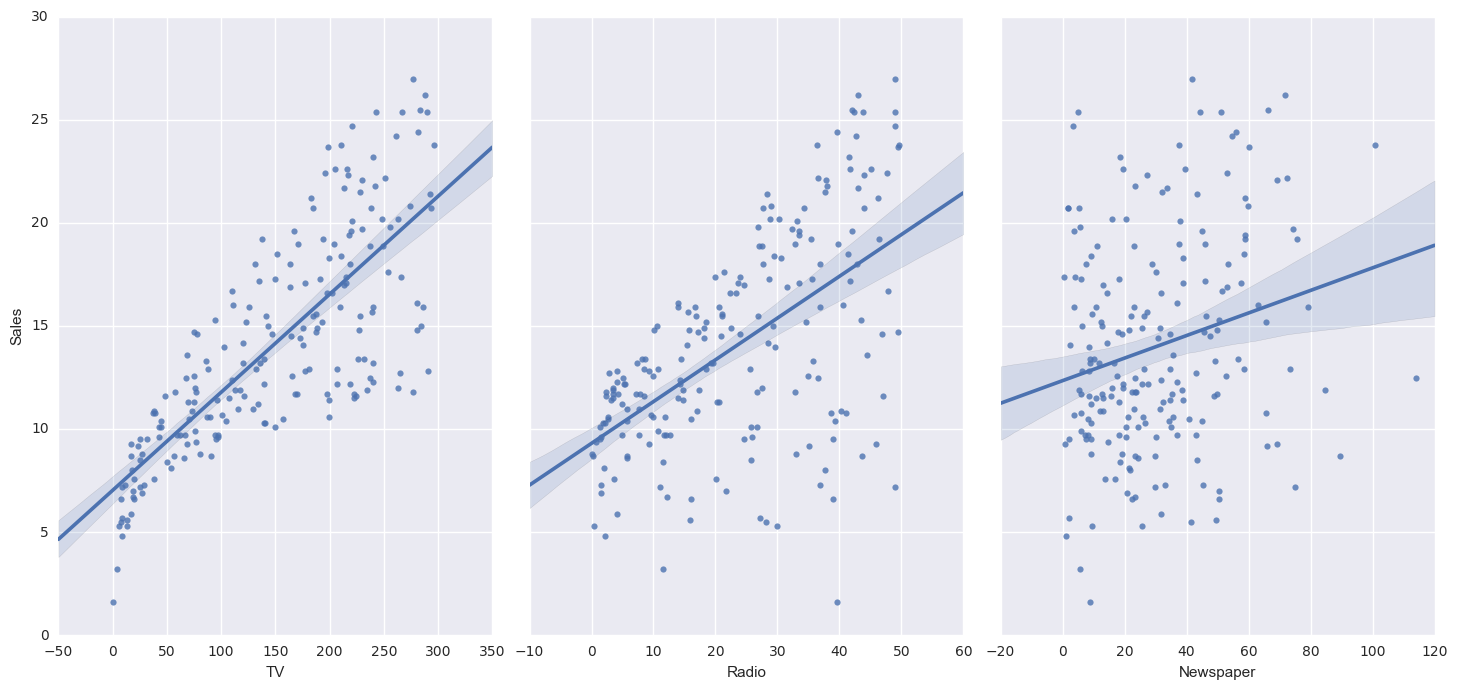

In [44]:
import seaborn as sns

%matplotlib inline
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## y=β0+β1x1+β2x2+...+βnxn

## y=β0+β1×TV+β2×Radio+β3×Newspapery=β0+β1×TV+β2×Radio+β3×Newspaper2

In [45]:
feature_cols = ['TV', 'Radio', 'Newspaper']

X = data[feature_cols]
X = data[['TV', 'Radio', 'Newspaper']]

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [46]:
y = data['Sales']
y = data.Sales
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [47]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [48]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [50]:
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150274),
 ('Radio', 0.17915812245088852),
 ('Newspaper', 0.0034504647111803788)]

### y=2.88+0.0466×TV+0.179×Radio+0.00345×Newspaper

In [51]:
y_pred = linreg.predict(X_test)

In [17]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()